In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
raw_data= pd.read_csv('Assignment.csv')
raw_data.head()

,days_to_event,reg_id,cust_id,public_or_private,number_regestries,event_state,amount,avg_cnvrt_days,age_grp,Converted
0,NaN,45882794,4.571000e+17,2,3,ID,14.946667,17,NaN,Yes
1,NaN,40411644,4.571000e+17,1,1,PR,15.000000,1,NaN,Yes
2,NaN,45356382,4.571000e+17,2,1,TX,152.540000,36,NaN,Yes
3,1935.0,37237691,4.571000e+17,2,3,IN,13.993333,19,GenZ,Yes
4,1354.0,38638018,1.589359e+09,2,1,TX,239.990000,60,GenZ,Yes


In [3]:
raw_data.corr()

,days_to_event,reg_id,cust_id,public_or_private,number_regestries,amount,avg_cnvrt_days
days_to_event,1.000000,-0.091571,-0.076242,-0.050758,-0.006123,0.031134,0.478926
reg_id,-0.091571,1.000000,0.056840,0.011347,-0.014723,0.012730,-0.075303
cust_id,-0.076242,0.056840,1.000000,0.026025,-0.008431,0.001660,-0.080370
public_or_private,-0.050758,0.011347,0.026025,1.000000,-0.023924,0.000588,-0.011927
number_regestries,-0.006123,-0.014723,-0.008431,-0.023924,1.000000,-0.272650,-0.019580
amount,0.031134,0.012730,0.001660,0.000588,-0.272650,1.000000,-0.015908
avg_cnvrt_days,0.478926,-0.075303,-0.080370,-0.011927,-0.019580,-0.015908,1.000000


In [4]:
raw_data= raw_data.dropna()
raw_data.head()

,days_to_event,reg_id,cust_id,public_or_private,number_regestries,event_state,amount,avg_cnvrt_days,age_grp,Converted
3,1935.0,37237691,4.571000e+17,2,3,IN,13.993333,19,GenZ,Yes
4,1354.0,38638018,1.589359e+09,2,1,TX,239.990000,60,GenZ,Yes
5,1354.0,38638018,1.589359e+09,2,1,TX,239.990000,60,GenZ,Yes
8,1187.0,36737685,1.762292e+08,1,1,OH,6.270000,15,GenZ,Yes
9,1187.0,36737685,1.762292e+08,1,1,OH,6.270000,15,GenZ,Yes


In [5]:
raw_data.describe()

,days_to_event,reg_id,cust_id,public_or_private,number_regestries,amount,avg_cnvrt_days
count,75656.000000,7.565600e+04,7.565600e+04,75656.000000,75656.000000,75656.000000,75656.000000
mean,125.842009,4.409345e+07,6.408590e+16,1.980054,2.188577,46.568089,59.541742
std,98.210731,4.426917e+06,1.590590e+17,0.139814,2.006791,50.962540,53.897347
min,-12768.000000,3.633100e+07,5.109530e+05,1.000000,1.000000,-10.616667,1.000000
25%,84.000000,4.052224e+07,1.236385e+08,2.000000,1.000000,13.714583,23.000000
50%,118.000000,4.392110e+07,9.401598e+08,2.000000,1.000000,25.990000,47.000000
75%,152.000000,4.702276e+07,1.985771e+09,2.000000,3.000000,59.990000,82.000000
max,1935.000000,5.184920e+07,5.823160e+17,2.000000,49.000000,1399.000000,660.000000


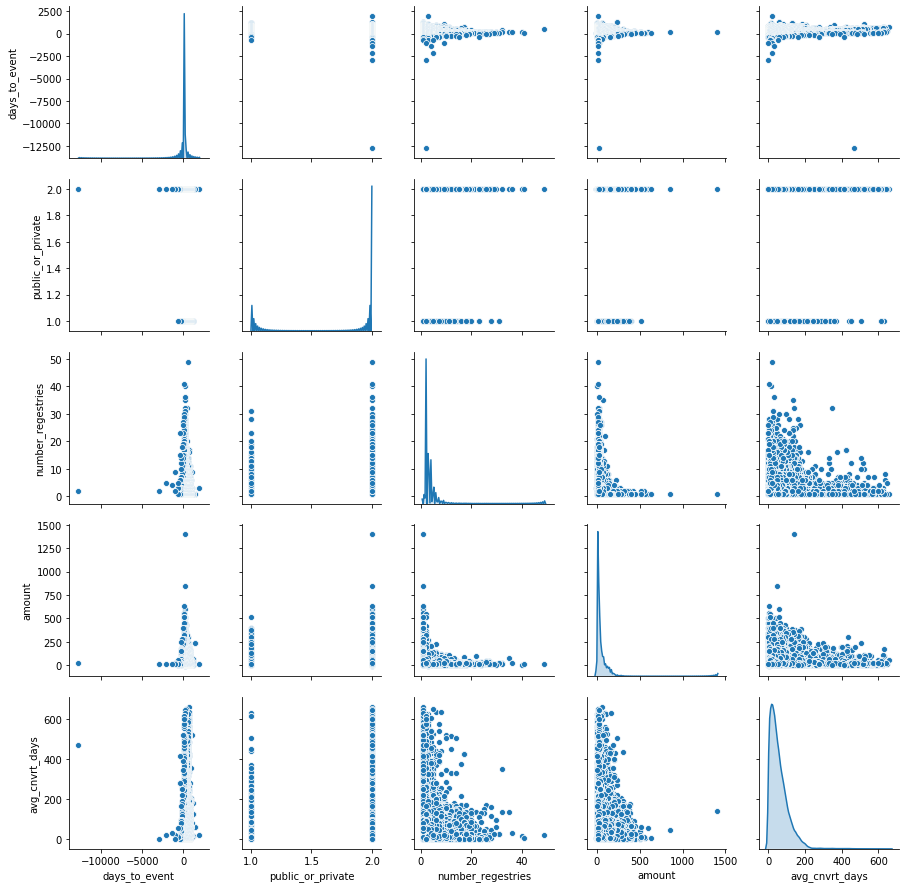

In [6]:
temp=raw_data[['days_to_event', 'public_or_private', 'number_regestries', 'amount', 'avg_cnvrt_days']]
sns.pairplot(temp, diag_kind = 'kde')
plt.show()

In [7]:
temp.describe()

,days_to_event,public_or_private,number_regestries,amount,avg_cnvrt_days
count,75656.000000,75656.000000,75656.000000,75656.000000,75656.000000
mean,125.842009,1.980054,2.188577,46.568089,59.541742
std,98.210731,0.139814,2.006791,50.962540,53.897347
min,-12768.000000,1.000000,1.000000,-10.616667,1.000000
25%,84.000000,2.000000,1.000000,13.714583,23.000000
50%,118.000000,2.000000,1.000000,25.990000,47.000000
75%,152.000000,2.000000,3.000000,59.990000,82.000000
max,1935.000000,2.000000,49.000000,1399.000000,660.000000


KeyError: 0

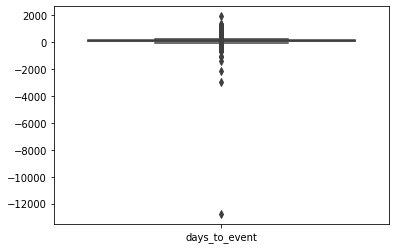

In [12]:
days_to_event= raw_data[['days_to_event']]
sns.boxplot(data= days_to_event)
count=0
for i in range(75656):
    if days_to_event[i]< 85:
        count+=1
        days_to_event[i]=118
        #print(Experience[i])
    elif days_to_event[i]>160:
        count+=1
        days_to_event[i]=118
        #print(Experience[i])
print(count)

In [ ]:
number_regestries= raw_data[['number_regestries']]
sns.boxplot(data= number_regestries)

In [ ]:
avg_cnvrt_days= raw_data[['avg_cnvrt_days']]
sns.boxplot(data= avg_cnvrt_days)

In [ ]:
amount= raw_data[['amount']]
sns.boxplot(data= amount)

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
raw_data['event_state']= label_encoder.fit_transform(raw_data['event_state'])   
raw_data['age_grp']= label_encoder.fit_transform(raw_data['age_grp'])
raw_data['Converted']= label_encoder.fit_transform(raw_data['Converted'])
raw_data.head()

In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=False)
raw_data_encoded = encoder.fit_transform(raw_data)
raw_data_encoded.head()

In [ ]:
public_or_private= pd.get_dummies(raw_data_encoded['public_or_private'])
event_state= pd.get_dummies(raw_data_encoded['event_state'])
age_grp= pd.get_dummies(raw_data_encoded['age_grp'])
Converted= pd.get_dummies(raw_data_encoded['Converted'])

In [ ]:
raw_data= raw_data_encoded.drop(['event_state', 'public_or_private', 'age_grp', 'Converted', 'cust_id'], axis=1)
raw_data= pd.concat([raw_data, age_grp], axis=1)
raw_data

In [ ]:
raw_data.columns=['days_to_event', 'reg_id', 'number_regestries', 'amount', 'conversion_days', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5']

In [ ]:
raw_data.head()

In [ ]:
raw_data= pd.concat([raw_data, public_or_private, Converted], axis=1)
raw_data.columns=['days_to_event', 'reg_id', 'number_regestries', 'amount', 'conversion_days', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'private','public', 'Converted- Yes']

In [ ]:
raw_data.head()

In [ ]:
max(event_state)

In [ ]:
data= raw_data= pd.concat([raw_data, event_state], axis=1)
data.head()

In [ ]:
data= data.drop(['amount'], axis=1)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1,normalize=True)
ridgereg.fit(raw_data['amount'],data)
y_pred = ridgereg.predict(raw_data['amount'])
    
    #Check if a plot is to be made for the entered alpha
if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

In [ ]:
import statsmodels.api as sm
y=raw_data['amount']
x1=data
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

In [ ]:
data= data.astype(int)
raw_data= raw_data.astype(int)

In [ ]:
X= raw_data['amount']
y=data
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)